In this jupyter notebook we explore submodelling. Where we partition the data based on a single column and then see how it performs in terms of the evaluation metrics. This is a crucial step as it provides the research with directions of future exploration. 

In [1]:
import pandas as pd
df = pd.read_feather("raw_incident_data_v2.feather")

In [2]:
len(df)

1340347

In [3]:
df.head()

,incident_count,date_created,hour_created,max_final_priority,inc_resourced,scrs_crime_inc,datazone,dzone_code,service_code_description,mm_ward_code,multi_member_ward
0,2,2023-05-24,15,STANDARD,False,True,Northfield and Piershill - 01,S01008743,THEFT,S13002932,Craigentinny/Duddingston
1,2,2023-08-11,7,PROMPT,False,False,Carntyne West and Haghill - 03,S01010244,ROAD TRAFFIC COLLISION,S13002975,Calton
2,2,2023-02-16,20,PROMPT,True,False,Charleston - 04,S01007848,ASSIST MEMBER OF THE PUBLIC,S13002546,Lochee
3,1,2023-02-16,21,PROMPT,True,False,Fort William North - 04,S01010513,ASSIST MEMBER OF THE PUBLIC,S13003000,Caol and Mallaig
4,1,2023-02-16,21,IMMEDIATE,True,False,City Centre - 05,S01007705,ASSIST MEMBER OF THE PUBLIC,S13002549,Maryfield


In [4]:
# Loading the lookup file
lookup = pd.read_csv('DataZone2011lookup_2024-12-16.csv', encoding='latin1')

In [5]:
lookup.head()

,DZ2011_Code,DZ2011_Name,IZ2011_Code,IZ2011_Name,MMWard_Code,MMWard_Name,LA_Code,LA_Name,SPC_Code,SPC_Name,...,UR2_Code,UR2_Name,UR3_Code,UR3_Name,UR6_Code,UR6_Name,UR8_Code,UR8_Name,Country_Code,Country_Name
0,S01006506,Culter - 01,S02001236,Culter,S13002843,Lower Deeside,S12000033,Aberdeen City,S16000076,Aberdeen South and North Kincardine,...,1,Rest of Scotland,1,Rest of Scotland,1,Large Urban Areas,1,Large Urban Areas,S92000003,Scotland
1,S01006507,Culter - 02,S02001236,Culter,S13002843,Lower Deeside,S12000033,Aberdeen City,S16000076,Aberdeen South and North Kincardine,...,1,Rest of Scotland,1,Rest of Scotland,1,Large Urban Areas,1,Large Urban Areas,S92000003,Scotland
2,S01006508,Culter - 03,S02001236,Culter,S13002843,Lower Deeside,S12000033,Aberdeen City,S16000076,Aberdeen South and North Kincardine,...,1,Rest of Scotland,1,Rest of Scotland,1,Large Urban Areas,1,Large Urban Areas,S92000003,Scotland
3,S01006509,Culter - 04,S02001236,Culter,S13002843,Lower Deeside,S12000033,Aberdeen City,S16000076,Aberdeen South and North Kincardine,...,1,Rest of Scotland,1,Rest of Scotland,1,Large Urban Areas,1,Large Urban Areas,S92000003,Scotland
4,S01006510,Culter - 05,S02001236,Culter,S13002843,Lower Deeside,S12000033,Aberdeen City,S16000076,Aberdeen South and North Kincardine,...,1,Rest of Scotland,1,Rest of Scotland,1,Large Urban Areas,1,Large Urban Areas,S92000003,Scotland


In [6]:
# Checking if codes in the dataset are completely present in the lookup dataset
common_values = set(df['mm_ward_code']).intersection(set(lookup['MMWard_Code']))
print(len(common_values)) # Every code exists

355


## Submodelling

In [7]:
df_filtered = df[df['service_code_description'] == "THEFT"]
len(df_filtered)

87517

### Preprocessing

In [8]:
df_filtered.head()

,incident_count,date_created,hour_created,max_final_priority,inc_resourced,scrs_crime_inc,datazone,dzone_code,service_code_description,mm_ward_code,multi_member_ward
0,2,2023-05-24,15,STANDARD,False,True,Northfield and Piershill - 01,S01008743,THEFT,S13002932,Craigentinny/Duddingston
166596,1,2022-04-01,7,STANDARD,False,True,Bonnyton and Town Centre - 01,S01008012,THEFT,S13002894,Kilmarnock West and Crosshouse
166597,1,2022-04-03,15,STANDARD,False,True,Springside and Rural - 01,S01011178,THEFT,S13003041,Irvine South
166598,1,2022-04-04,17,STANDARD,True,True,City Centre South - 04,S01010275,THEFT,S13002976,Anderston/City/Yorkhill
166599,1,2022-04-09,7,STANDARD,False,True,"Invergowrie, Longforgan and Abernyte - 02",S01011966,THEFT,S13003063,Carse of Gowrie


In [9]:
df_filtered.dtypes

incident_count               int32
date_created                object
hour_created                 int32
max_final_priority          object
inc_resourced                 bool
scrs_crime_inc                bool
datazone                    object
dzone_code                  object
service_code_description    object
mm_ward_code                object
multi_member_ward           object
dtype: object

In [10]:
# covert bool vars to cat
bool_vars = ['scrs_crime_inc', 'inc_resourced']
df_filtered.loc[:, bool_vars] = df_filtered[bool_vars].astype('category')

/tmp/dcs-tmp.u2164966/ipykernel_365342/2146405816.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[True, True, True, True, True, ..., True, True, True, True, True]
Length: 87517
Categories (2, bool): [False, True]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_filtered.loc[:, bool_vars] = df_filtered[bool_vars].astype('category')
/tmp/dcs-tmp.u2164966/ipykernel_365342/2146405816.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[False, False, False, True, False, ..., False, True, False, False, False]
Length: 87517
Categories (2, bool): [False, True]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_filtered.loc[:, bool_vars] = df_filtered[bool_vars].astype('category')


In [11]:
df_filtered.dtypes

incident_count                 int32
date_created                  object
hour_created                   int32
max_final_priority            object
inc_resourced               category
scrs_crime_inc              category
datazone                      object
dzone_code                    object
service_code_description      object
mm_ward_code                  object
multi_member_ward             object
dtype: object

In [12]:
# converting date variable to a number in [startdate, enddate]
import pandas as pd

# make sure date_created is datetime
df_filtered['date_created'] = pd.to_datetime(df_filtered['date_created'])

# compute day offset from min date, then +1
min_date = df_filtered['date_created'].min()  # 2022-04-01 00:00:00
df_filtered['date_seq'] = (df_filtered['date_created'] - min_date).dt.days + 1

# compute min/max of each
min_date = df_filtered['date_created'].min()
max_date = df_filtered['date_created'].max()
min_seq  = df_filtered['date_seq'].min()
max_seq  = df_filtered['date_seq'].max()

# grab the corresponding dates from the mapped column
mapped_min_date = df_filtered.loc[df_filtered['date_seq'] == min_seq, 'date_created'].iloc[0]
mapped_max_date = df_filtered.loc[df_filtered['date_seq'] == max_seq, 'date_created'].iloc[0]

# sanity‐check
print(f"earliest actual date: {min_date}, mapped date at seq {min_seq}: {mapped_min_date}")
print(f" latest actual date: {max_date}, mapped date at seq {max_seq}: {mapped_max_date}")

earliest actual date: 2022-04-01 00:00:00, mapped date at seq 1: 2022-04-01 00:00:00
 latest actual date: 2024-06-28 00:00:00, mapped date at seq 820: 2024-06-28 00:00:00


/tmp/dcs-tmp.u2164966/ipykernel_365342/1331622775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date_created'] = pd.to_datetime(df_filtered['date_created'])
/tmp/dcs-tmp.u2164966/ipykernel_365342/1331622775.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date_seq'] = (df_filtered['date_created'] - min_date).dt.days + 1


In [13]:
df_filtered = df_filtered.drop('date_created', axis=1)
df_filtered.head()

,incident_count,hour_created,max_final_priority,inc_resourced,scrs_crime_inc,datazone,dzone_code,service_code_description,mm_ward_code,multi_member_ward,date_seq
0,2,15,STANDARD,False,True,Northfield and Piershill - 01,S01008743,THEFT,S13002932,Craigentinny/Duddingston,419
166596,1,7,STANDARD,False,True,Bonnyton and Town Centre - 01,S01008012,THEFT,S13002894,Kilmarnock West and Crosshouse,1
166597,1,15,STANDARD,False,True,Springside and Rural - 01,S01011178,THEFT,S13003041,Irvine South,3
166598,1,17,STANDARD,True,True,City Centre South - 04,S01010275,THEFT,S13002976,Anderston/City/Yorkhill,4
166599,1,7,STANDARD,False,True,"Invergowrie, Longforgan and Abernyte - 02",S01011966,THEFT,S13003063,Carse of Gowrie,9


In [14]:
df_filtered.dtypes

incident_count                 int32
hour_created                   int32
max_final_priority            object
inc_resourced               category
scrs_crime_inc              category
datazone                      object
dzone_code                    object
service_code_description      object
mm_ward_code                  object
multi_member_ward             object
date_seq                       int64
dtype: object

In [15]:
import unicodedata

# Function to normalize multi_member_ward values
def normalize_ward_name(name):
    if pd.isnull(name):
        return name
    name = unicodedata.normalize("NFKD", name).encode("ascii", "ignore").decode("utf-8")
    name = name.replace("&", "and").replace("/", ",").replace("'", "").strip()
    name = ' '.join(name.split())  # remove extra internal spaces
    return name.lower()  # optional: lowercase for consistency

# Apply to real dataset before training
df_filtered["multi_member_ward"] = df_filtered["multi_member_ward"].map(normalize_ward_name)
lookup["MMWard_Name"] = lookup["MMWard_Name"].map(normalize_ward_name)

In [16]:
print(len(df_filtered["multi_member_ward"].dropna().unique()))

352


In [17]:
lookup['MMWard_Name'].unique()

array(['lower deeside', 'airyhall,broomhill,garthdee',
       'hazlehead,queens cross,countesswells',
       'kingswells,sheddocksley,summerhill', 'midstocket,rosemount',
       'torry,ferryhill', 'george st,harbour', 'kincorth,nigg,cove',
       'hilton,woodside,stockethill', 'tillydrone,seaton,old aberdeen',
       'northfield,mastrick north', 'dyce,bucksburn,danestone',
       'bridge of don', 'aboyne, upper deeside and donside',
       'banchory and mid deeside', 'mearns',
       'stonehaven and lower deeside', 'north kincardine',
       'westhill and district', 'huntly, strathbogie and howe of alford',
       'west garioch', 'inverurie and district', 'east garioch',
       'mid formartine', 'ellon and district', 'central buchan',
       'turriff and district', 'banff and district', 'troup',
       'peterhead south and cruden', 'peterhead north and rattray',
       'fraserburgh and district', 'monifieth and sidlaw',
       'carnoustie and district', 'arbroath west, letham and frioc

In [18]:
# Checking difference between the lookup and df multi_ward_member names
df_set = set(df_filtered["multi_member_ward"])
lookup_set = set(lookup['MMWard_Name'])

print(lookup_set-df_set) # this might be a location where a theft was not recorded in the recent years

{'uibhist a tuath'}


## Training a CTGAN

In [20]:
# Removing unnecessary columns
df_filtered = df_filtered.drop(['incident_count','datazone', 'dzone_code'], axis=1)

In [21]:
df_filtered = df_filtered.drop('mm_ward_code', axis=1)

In [22]:
from sdv.metadata import Metadata

cat_cols  = ["max_final_priority", "service_code_description", 'scrs_crime_inc', 'inc_resourced', 'multi_member_ward']
df_filtered[cat_cols] = df_filtered[cat_cols].astype('object')

In [23]:
df_filtered.to_pickle("df_filtered_theft.pkl")

In [100]:
# 1. auto-detect metadata based in your data
metadata = Metadata.detect_from_dataframes({"incidents":df_filtered})

# 2. carefully inspect and update your metadata
metadata.visualize()

metadata.validate()

# 3. when you're done, save it to a file for future use
metadata.save_to_json('my_final_metadata_v2.json')

In [99]:
metadata

{
    "tables": {
        "incidents": {
            "columns": {
                "hour_created": {
                    "sdtype": "numerical"
                },
                "max_final_priority": {
                    "sdtype": "categorical"
                },
                "inc_resourced": {
                    "sdtype": "categorical"
                },
                "scrs_crime_inc": {
                    "sdtype": "categorical"
                },
                "service_code_description": {
                    "sdtype": "categorical"
                },
                "multi_member_ward": {
                    "sdtype": "categorical"
                },
                "date_seq": {
                    "sdtype": "numerical"
                }
            }
        }
    },
    "relationships": [],
    "METADATA_SPEC_VERSION": "V1"
}

In [101]:
from sdv.single_table import CTGANSynthesizer
ctgan = CTGANSynthesizer(
    metadata,
    epochs=300,
    batch_size=1024,
    pac=8,
    embedding_dim=128,
    generator_dim=(256, 256),
    discriminator_dim=(256, 256),
    generator_lr=2e-4,
    discriminator_lr=2e-4,
    cuda=True,
    verbose=True
)

In [102]:
ctgan.fit(
    data=df_filtered,
)

/dcs/large/u2164966/MSc_Dissertation/myenv/lib64/python3.12/site-packages/sdv/single_table/ctgan.py:252: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

Gen. (0.09) | Discrim. (-0.02): 100%|██████████| 300/300 [11:30<00:00,  2.30s/it] 


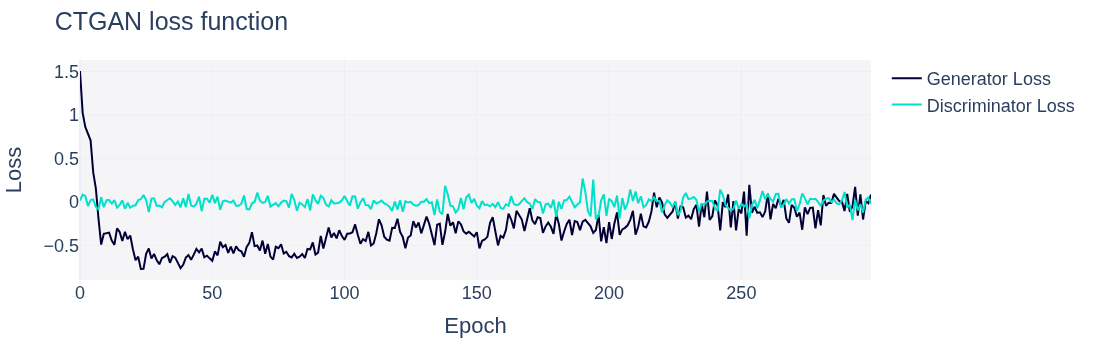

In [103]:
# Visualising the loss functions
fig = ctgan.get_loss_values_plot()
fig.show()

In [104]:
# Saving the model to a pickle file
ctgan.save(
    filepath='ctgan_theft_v2.pkl'
)

## Exploring CTGAN

In [106]:
# loading the ctgan
from sdv.single_table import CTGANSynthesizer

# Loading the model from the pickle file
ctgan = CTGANSynthesizer.load(
    filepath='ctgan_theft_v2.pkl'
)

In [107]:
# checking the number of datapoints
len(df_filtered)

87517

In [108]:
# Generating synthetic data
synthetic_data = ctgan.sample(
    num_rows= 87517, # generating the same number of data points as the real dataset
    batch_size=1_000
)

Sampling rows: : 88000it [00:02, 33512.46it/s]                         


In [111]:
# quick look at the synthetic data
synthetic_data.head()

,hour_created,max_final_priority,inc_resourced,scrs_crime_inc,service_code_description,multi_member_ward,date_seq
0,13,STANDARD,False,True,THEFT,bellshill,731
1,11,STANDARD,False,True,THEFT,west end,647
2,18,STANDARD,True,True,THEFT,midlothian west,516
3,15,STANDARD,False,True,THEFT,inverclyde north,435
4,18,STANDARD,False,True,THEFT,city centre,416


## Heatmap

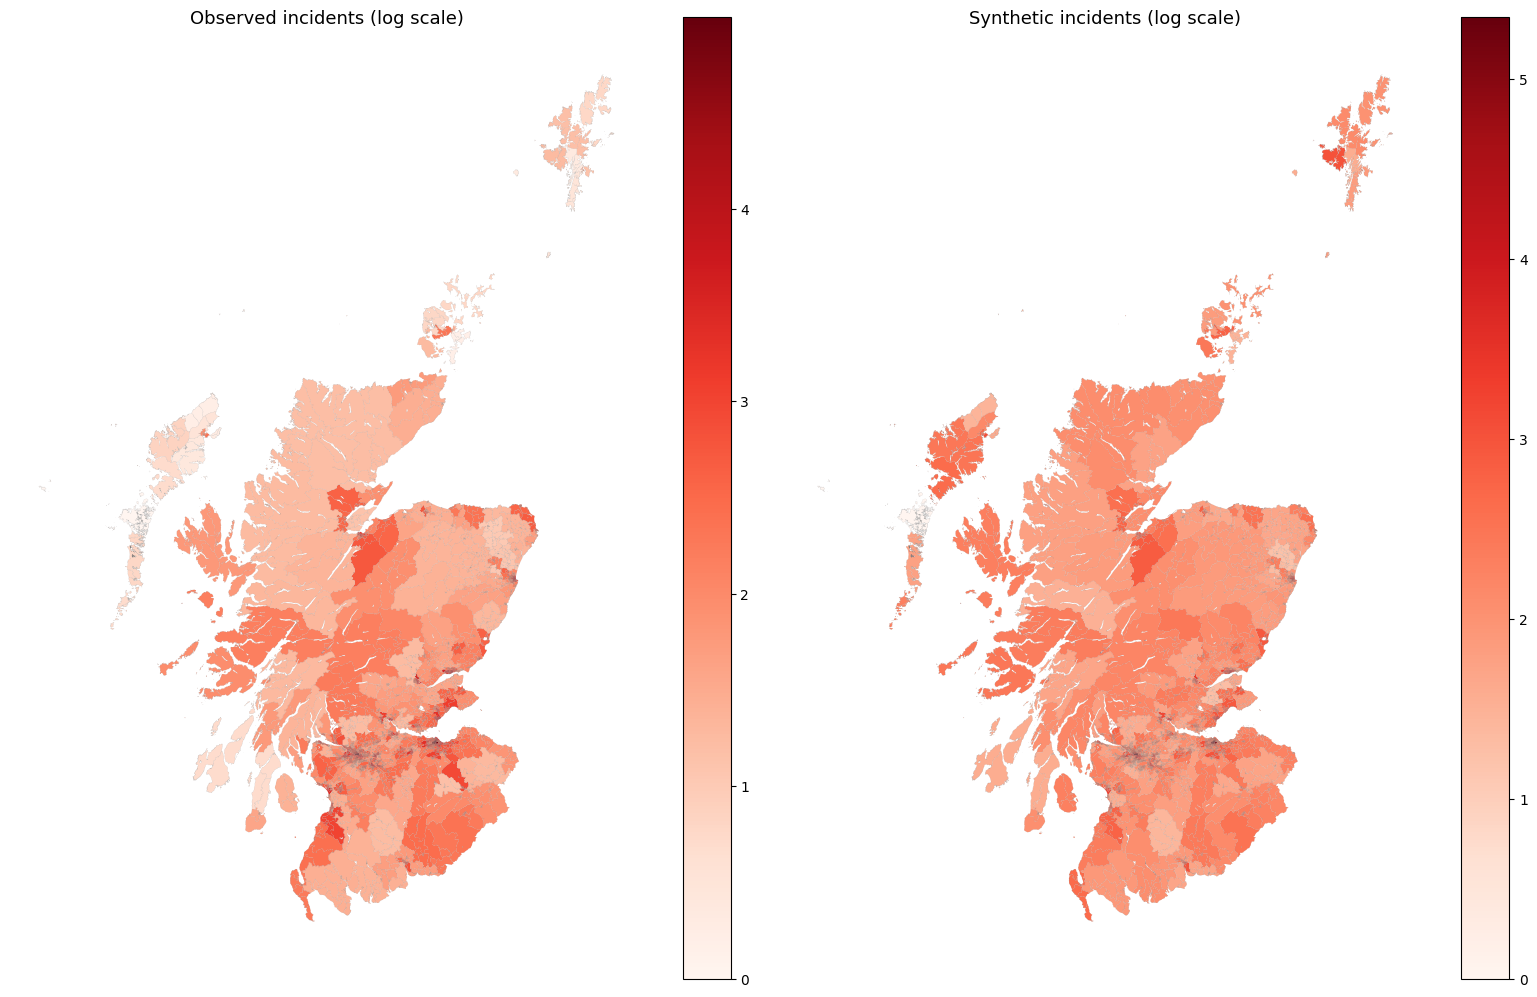

In [112]:
# ───────────────────────────  0.  HOUSEKEEPING  ───────────────────────────
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from rapidfuzz import process, fuzz
import unicodedata

# If your lookup hasn’t been renamed yet, do it once:
lookup = (lookup
          .rename(columns={"DZ2011_Code": "DataZone"})        # <-- change only if needed
          [["DataZone", "MMWard_Name"]])                      # keep essentials

# ───────────────────────  0.1  FUZZY WARD NAME MATCHING  ───────────────────────

# Helper to normalize ward names (lowercase, remove accents, clean symbols)
def normalize_ward_name(name: str) -> str:
    if pd.isnull(name):
        return ''
    name = unicodedata.normalize("NFKD", name).encode("ascii", "ignore").decode()
    name = name.replace("&", "and").replace("/", ",").replace("'", "").lower()
    return ' '.join(name.split()).strip()

# Build a dictionary of cleaned → original ward names from real data
real_wards = df_filtered['multi_member_ward'].dropna().unique()
real_clean = {normalize_ward_name(name): name for name in real_wards}

# Map each synthetic ward name to the closest real one using fuzzy matching
def match_ward(name):
    cleaned = normalize_ward_name(name)
    match, score, _ = process.extractOne(cleaned, real_clean.keys(), scorer=fuzz.token_sort_ratio)
    return real_clean[match] if score > 85 else name  # Threshold can be adjusted

# Apply fuzzy mapping to synthetic data
synthetic_data["multi_member_ward"] = synthetic_data["multi_member_ward"].map(match_ward)

# ───────────────────────────  1.  WARD-LEVEL COUNTS  ───────────────────────────
for frame in (df_filtered, synthetic_data):
    frame["incident_count"] = 1                               # one incident per row

obs_ward = (df_filtered
            .groupby("multi_member_ward", as_index=False)["incident_count"]
            .sum()
            .rename(columns={"multi_member_ward": "MMWard_Name",
                             "incident_count": "ward_incidents"}))

syn_ward = (synthetic_data
            .groupby("multi_member_ward", as_index=False)["incident_count"]
            .sum()
            .rename(columns={"multi_member_ward": "MMWard_Name",
                             "incident_count": "ward_incidents"}))

# ───────────────────────────  2.  EXPAND TO DATA-ZONE  ───────────────────────────
dz_per_ward = (lookup
               .groupby("MMWard_Name")
               .size()
               .rename("n_dz")
               .reset_index())

def expand_to_dz(ward_counts: pd.DataFrame) -> pd.DataFrame:
    out = (ward_counts
           .merge(lookup, on="MMWard_Name", how="left")       # duplicate per DZ
           .merge(dz_per_ward, on="MMWard_Name", how="left"))
    out["dz_incidents"] = out["ward_incidents"] / out["n_dz"] # uniform share
    return out[["DataZone", "dz_incidents"]]

obs_dz = expand_to_dz(obs_ward)
syn_dz = expand_to_dz(syn_ward)

# ───────────────────────────  3.  LOAD & RENAME SHAPEFILE  ───────────────────────────
shp_path = "shape_files/SG_DataZone_Bdry_2011.shp"

# Print once to discover the real DZ column name, if unsure:
# print(gpd.read_file(shp_path, rows=0).columns)

shp = (gpd.read_file(shp_path)
       .rename(columns={"DZ_CODE": "DataZone"})                # CHANGE 'DZ_CODE' if needed
       .to_crs(epsg=4326))

# ───────────────────────────  4.  JOIN COUNTS → POLYGONS  ───────────────────────────
def attach_counts(gdf_base: gpd.GeoDataFrame,
                  dz_counts: pd.DataFrame) -> gpd.GeoDataFrame:
    gdf = (gdf_base.merge(dz_counts, on="DataZone", how="left")
                    .fillna({"dz_incidents": 0}))
    gdf["log_inc"] = np.log1p(gdf["dz_incidents"])             # log(x+1)
    return gdf

gdf_obs = attach_counts(shp, obs_dz)
gdf_syn = attach_counts(shp, syn_dz)

# ───────────────────────────  5.  PLOT SIDE-BY-SIDE  ───────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(16, 10), sharex=True, sharey=True)

for ax, gdf, title in [
        (axes[0], gdf_obs, "Observed incidents (log scale)"),
        (axes[1], gdf_syn, "Synthetic incidents (log scale)")]:
    gdf.plot(column="log_inc",
             ax=ax,
             cmap="Reds",
             legend=True,                    # still shows a colourbar
             edgecolor="grey",
             linewidth=0.05)
    ax.set_title(title, fontsize=13)
    ax.axis("off")
plt.tight_layout()
plt.show()

## Exploring difference between real and synthetic data

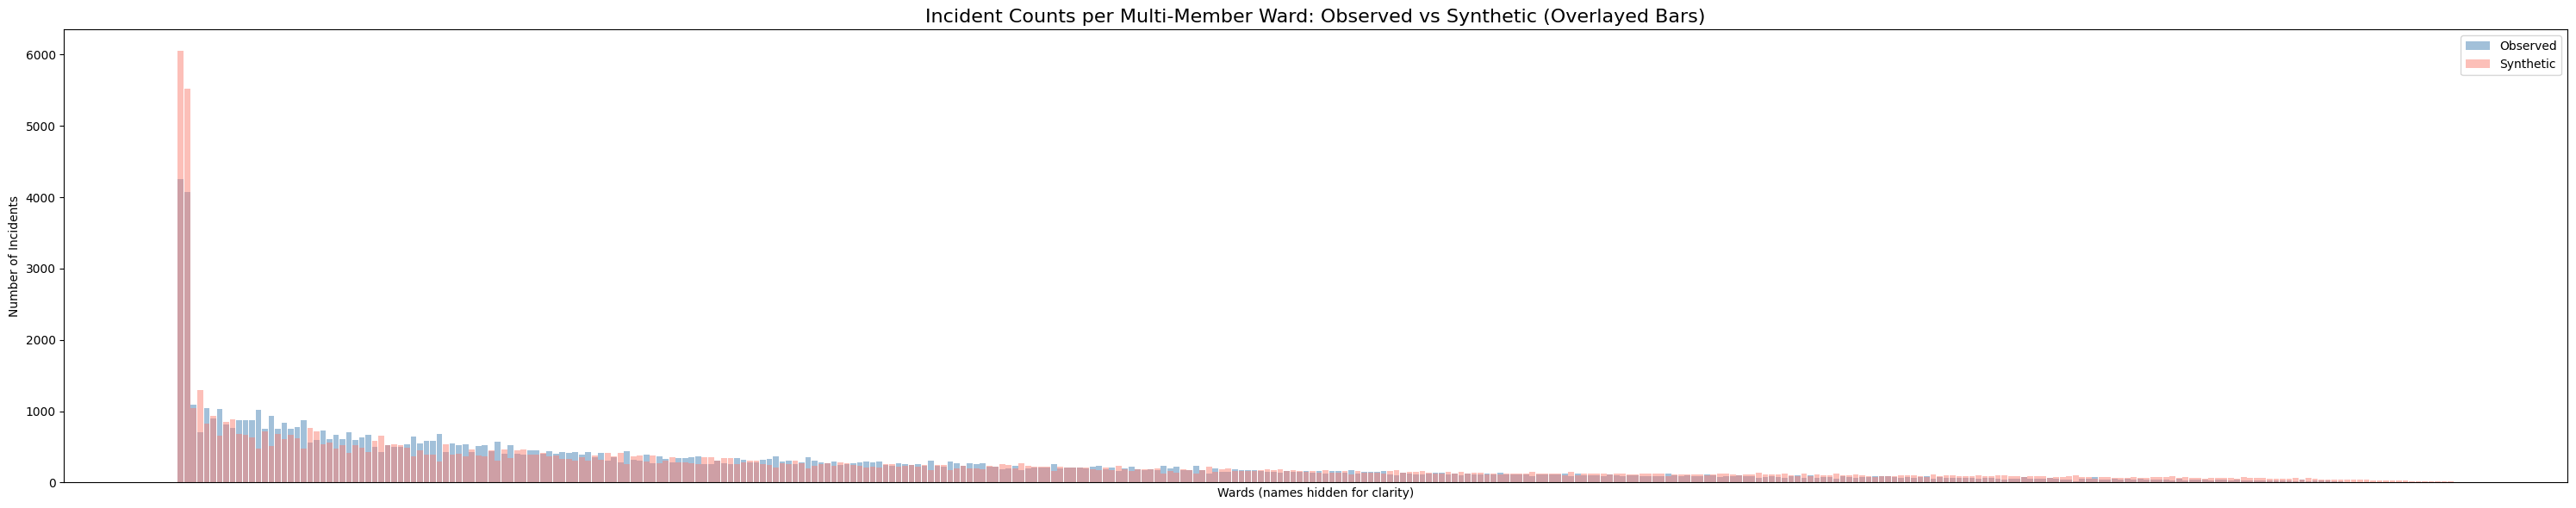

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Compute incident counts per ward
obs_counts = df_filtered.groupby("multi_member_ward").size().rename("Observed")
syn_counts = synthetic_data.groupby("multi_member_ward").size().rename("Synthetic")

# Step 2: Combine into a single DataFrame
ward_combined = pd.concat([obs_counts, syn_counts], axis=1).fillna(0)

# Step 3: Sort by total incidents for visual consistency
ward_combined["total"] = ward_combined["Observed"] + ward_combined["Synthetic"]
ward_combined = ward_combined.sort_values("total", ascending=False).drop(columns="total").reset_index()

# Step 4: Plot overlapping bars
plt.figure(figsize=(30, 6))  # Wider plot
plt.bar(x=ward_combined.index,
        height=ward_combined["Observed"],
        width=0.9,
        alpha=0.5,
        label="Observed",
        color="steelblue")

plt.bar(x=ward_combined.index,
        height=ward_combined["Synthetic"],
        width=0.9,
        alpha=0.5,
        label="Synthetic",
        color="salmon")

# Formatting
plt.title("Incident Counts per Multi-Member Ward: Observed vs Synthetic (Overlayed Bars)", fontsize=16)
plt.xlabel("Wards (names hidden for clarity)")
plt.ylabel("Number of Incidents")
plt.xticks([], [])  # Hide all x-axis labels
plt.legend()
plt.tight_layout()
plt.show()

/dcs/large/u2164966/MSc_Dissertation/myenv/lib64/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



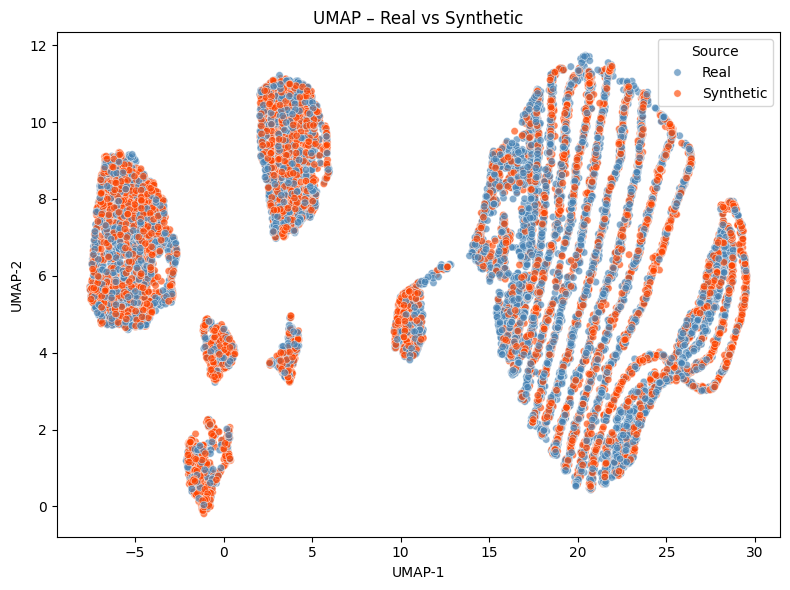

In [123]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import umap.umap_ as umap

# ────────────────────── 1.  merge & label ──────────────────────
df_real      = df_filtered.copy().assign(source="Real")
df_synth     = synthetic_data.copy().assign(source="Synthetic")
data         = pd.concat([df_real, df_synth], ignore_index=True)

# ────────────────────── 2.  feature lists ──────────────────────
numeric_cols      = ["hour_created", "date_seq"]          
categorical_cols  = [
    "max_final_priority", "inc_resourced", "scrs_crime_inc",
    "service_code_description", "multi_member_ward",
]
data[categorical_cols] = data[categorical_cols].astype("string").fillna("missing")

# ────────────────────── 3.  preprocessing ──────────────────────
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # << new flag
preproc = ColumnTransformer(
    [("num", StandardScaler(), numeric_cols),
     ("cat", ohe, categorical_cols)]
)

# optional: down-sample for speed
MAX_N = 20000
if len(data) > MAX_N:
    data = data.sample(MAX_N, random_state=42)

X = data.drop(columns=["source", "incident_count"], errors="ignore")
y = data["source"].to_numpy()

# ────────────────────── 4.  UMAP ──────────────────────
pipe = Pipeline([
    ("prep", preproc),
    ("umap", umap.UMAP(
        n_components=2, n_neighbors=50, min_dist=0.2,
        metric="euclidean", random_state=42)),
])
X_emb = pipe.fit_transform(X)

# ────────────────────── 5.  plot ──────────────────────
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_emb[:,0], y=X_emb[:,1], hue=y,
                palette={"Real":"steelblue", "Synthetic":"orangered"},
                alpha=.65, s=28)
plt.title("UMAP – Real vs Synthetic"); plt.xlabel("UMAP-1"); plt.ylabel("UMAP-2")
plt.legend(title="Source"); plt.tight_layout(); plt.show()

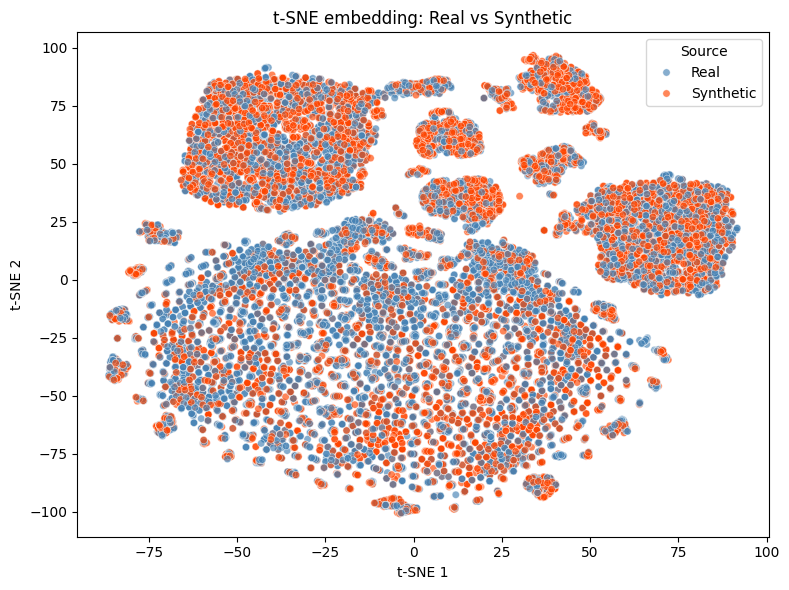

In [124]:
# ─────────────────────────────  t-SNE  (Real vs Synthetic)  ─────────────────────────────
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

# 1)  Merge datasets and tag their origin -----------------------------------------------
df_real   = df_filtered.copy().assign(source="Real")
df_syn    = synthetic_data.copy().assign(source="Synthetic")
data      = pd.concat([df_real, df_syn], ignore_index=True)

# 2)  Define feature lists --------------------------------------------------------------
numeric_cols = ["hour_created", "date_seq"]        
categorical_cols = [
    "max_final_priority",
    "inc_resourced",
    "scrs_crime_inc",
    "service_code_description",
    "multi_member_ward",
]

# ensure categoricals are strings and NaN-safe
data[categorical_cols] = data[categorical_cols].astype("string").fillna("missing")

# 3)  Pre-processing pipeline -----------------------------------------------------------
preproc = ColumnTransformer(
    [
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore",
                              sparse_output=False),      # new flag in sklearn ≥1.4
         categorical_cols),
    ]
)

# 4)  Optional down-sample for speed (t-SNE is O(N²)) -----------------------------------
MAX_N = 20000
if len(data) > MAX_N:
    data = data.sample(MAX_N, random_state=42)

X = data.drop(columns=["source", "incident_count"], errors="ignore")
y = data["source"].to_numpy()

# 5)  Pipeline:  pre-process → t-SNE -----------------------------------------------------
tsne_pipe = Pipeline(
    [
        ("prep", preproc),
        ("tsne", TSNE(
            n_components=2,
            perplexity=40,           # tweak if very small/large sample
            learning_rate="auto",
            init="pca",
            random_state=42,
        )),
    ]
)

X_emb = tsne_pipe.fit_transform(X)

# 6)  Plot ------------------------------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_emb[:, 0], y=X_emb[:, 1],
    hue=y,
    palette={"Real": "steelblue", "Synthetic": "orangered"},
    alpha=0.65, s=28,
)
plt.title("t-SNE embedding: Real vs Synthetic")
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.legend(title="Source"); plt.tight_layout(); plt.show()


In [128]:
real_df = df_filtered.copy()
syn_df = synthetic_data.copy()

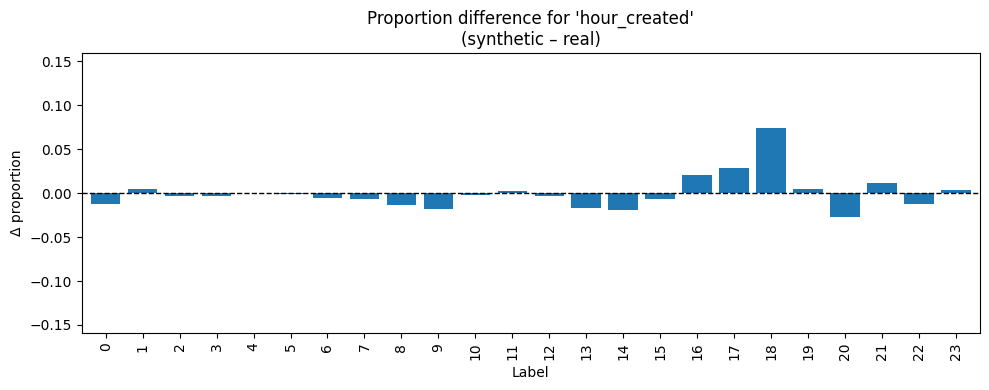

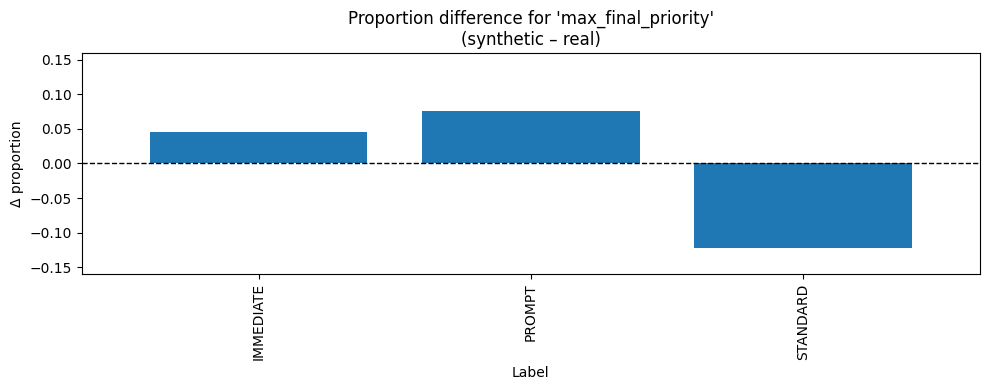

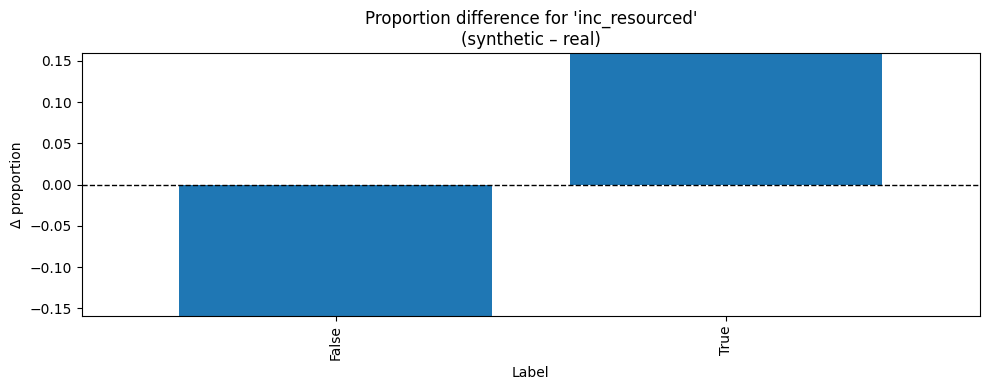

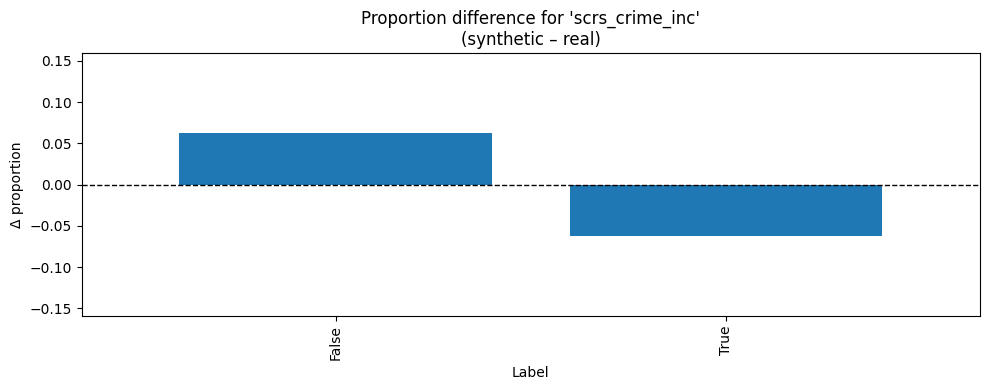

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

cols = [
    "hour_created",
    "max_final_priority",
    "inc_resourced",
    "scrs_crime_inc",
]

def compute_max_diff(real_df, synth_df, cols):
    max_diff = 0
    for col in cols:
        r = real_df[col].value_counts(normalize=True, dropna=False)
        s = synth_df[col].value_counts(normalize=True, dropna=False)
        diff = s.subtract(r, fill_value=0)
        max_diff = max(max_diff, diff.abs().max())
    return max_diff

def plot_prop_diff(real_df: pd.DataFrame, synth_df: pd.DataFrame, column: str, y_limit: float):
    """Plot (synth – real) proportion for every label in `column` with fixed scale."""
    # proportional frequency for each dataset
    r = real_df[column].value_counts(normalize=True, dropna=False)
    s = synth_df[column].value_counts(normalize=True, dropna=False)

    # align indexes so every label appears in both Series
    diff = s.subtract(r, fill_value=0).sort_index()

    # convert index to string for better axis readability
    diff.index = diff.index.astype(str)

    # create plot
    ax = diff.plot(kind="bar", width=0.8, figsize=(10, 4))
    ax.set_title(f"Proportion difference for '{column}'\n(synthetic – real)")
    ax.set_ylabel("Δ proportion")
    ax.axhline(0, linewidth=1, color='black', linestyle='--')
    ax.set_ylim(-y_limit, y_limit)

    # Optionally remove x-axis labels and ticks for 'multi_member_ward'
    if column == "date_seq":
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_xlabel("")  # Also remove x-axis label
    else:
        ax.set_xlabel("Label")

    plt.tight_layout()
    plt.show()


# Compute fixed y-axis limit
y_limit = compute_max_diff(real_df, syn_df, cols)

# Generate all plots
for col in cols:
    plot_prop_diff(real_df, syn_df, col, y_limit)


Text(0.5, 0, '')

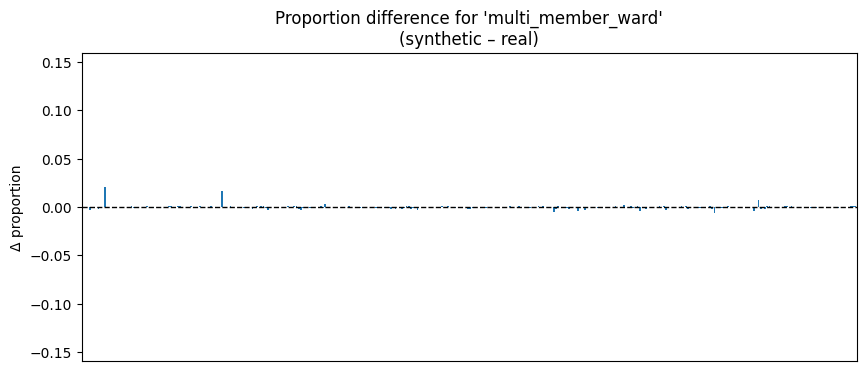

In [132]:
r = real_df['multi_member_ward'].value_counts(normalize=True, dropna=False)
s = syn_df['multi_member_ward'].value_counts(normalize=True, dropna=False)

# align indexes so every label appears in both Series
diff = s.subtract(r, fill_value=0).sort_index()

# convert index to string for better axis readability
diff.index = diff.index.astype(str)

# create plot
ax = diff.plot(kind="bar", width=0.8, figsize=(10, 4))
ax.set_title(f"Proportion difference for '{'multi_member_ward'}'\n(synthetic – real)")
ax.set_ylabel("Δ proportion")
ax.axhline(0, linewidth=1, color='black', linestyle='--')
ax.set_ylim(-y_limit, y_limit)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel("")  # Also remove x-axis label

Text(0.5, 0, '')

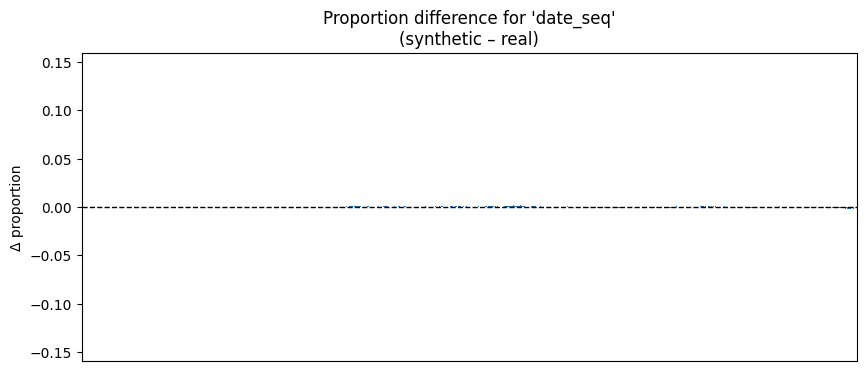

In [133]:
r = real_df['date_seq'].value_counts(normalize=True, dropna=False)
s = syn_df['date_seq'].value_counts(normalize=True, dropna=False)

# align indexes so every label appears in both Series
diff = s.subtract(r, fill_value=0).sort_index()

# convert index to string for better axis readability
diff.index = diff.index.astype(str)

# create plot
ax = diff.plot(kind="bar", width=0.8, figsize=(10, 4))
ax.set_title(f"Proportion difference for '{'date_seq'}'\n(synthetic – real)")
ax.set_ylabel("Δ proportion")
ax.axhline(0, linewidth=1, color='black', linestyle='--')
ax.set_ylim(-y_limit, y_limit)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_xlabel("")  # Also remove x-axis label